In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import zscore
from scipy import stats

In [2]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [3]:
!kaggle datasets download -d nayansubedi1/airplane-crashes-and-fatalities-upto-2023

Dataset URL: https://www.kaggle.com/datasets/nayansubedi1/airplane-crashes-and-fatalities-upto-2023
License(s): DbCL-1.0
100% 624k/624k [00:00<00:00, 1.42MB/s]
100% 624k/624k [00:00<00:00, 1.42MB/s]


In [4]:
!unzip airplane-crashes-and-fatalities-upto-2023.zip

Archive:  airplane-crashes-and-fatalities-upto-2023.zip
  inflating: Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv  


In [23]:
airplane_crashes = pd.read_csv('/content/Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv', encoding = 'latin1')

In [9]:
airplane_crashes

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,11/21/2022,10:15,"Medellín, Colombia",AeroPaca SAS,NaN,Medellín - Pizarro,Piper PA-31-350 Navajo Chieftain,HK-5121,31-7652004,8.0,6.0,2.0,8.0,6.0,2.0,0.0,The plane was chartered to carry a team of six...
4994,1/15/2023,10:50,"Pokhara, Nepal",Yeti Airlines,YT691,Kathmandu - Pokhara,ATR 72-500-72-212-A,9NANC,754,72.0,68.0,4.0,72.0,68.0,4.0,0.0,"Before approach, the pilot requested a change ..."
4995,9/16/2023,NaN,"Barcelos, Brazil",Manaus Aerotaxi,NaN,NaN,Embraer EMB-110P1 Bandeirante,PT-SOG,110490,14.0,12.0,2.0,14.0,12.0,2.0,0.0,The air taxi crashed in heavy rain while attem...
4996,10/29/2023,6:30,"Rio Branco, Brazil",ART Taxi Aero,NaN,Rio Branco - Envira,Cessna 208B Grand Caravan,PT-MEE,208B0344,12.0,10.0,2.0,12.0,10.0,2.0,0.0,The air taxi crashed into a heavy wooded area ...


In [7]:
airplane_crashes.isnull().sum()

Date                        0
Time                     1512
Location                    4
Operator                   10
Flight #                 3669
Route                     777
AC Type                    15
Registration              274
cn/ln                     668
Aboard                     18
Aboard Passangers         229
Aboard Crew               226
Fatalities                  8
Fatalities Passangers     242
Fatalities Crew           241
Ground                     42
Summary                    64
dtype: int64

In [10]:
airplane_crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4998 non-null   object 
 1   Time                   3486 non-null   object 
 2   Location               4994 non-null   object 
 3   Operator               4988 non-null   object 
 4   Flight #               1329 non-null   object 
 5   Route                  4221 non-null   object 
 6   AC Type                4983 non-null   object 
 7   Registration           4724 non-null   object 
 8   cn/ln                  4330 non-null   object 
 9   Aboard                 4980 non-null   float64
 10  Aboard Passangers      4769 non-null   float64
 11  Aboard Crew            4772 non-null   float64
 12  Fatalities             4990 non-null   float64
 13  Fatalities Passangers  4756 non-null   float64
 14  Fatalities Crew        4757 non-null   float64
 15  Grou

In [24]:
airplane_crashes['Date']= pd.to_datetime(airplane_crashes['Date'])

In [25]:
airplane_crashes['Operator'].fillna({'Operator':'Unknown'}, inplace=True)

In [37]:
airplane_crashes_cleaned = airplane_crashes.dropna(subset=['Location']).copy()

In [38]:
columns_to_delete = ['Aboard Crew', 'Aboard Passangers', 'Fatalities Passangers', 'Fatalities Crew', 'Flight #']
airplane_crashes_cleaned.drop(columns=columns_to_delete, inplace=True)

In [39]:
airplane_crashes_cleaned = airplane_crashes_cleaned.dropna(subset=['Fatalities']).copy()

In [40]:
airplane_crashes_cleaned

,Date,Time,Location,Operator,Route,AC Type,Registration,cn/ln,Aboard,Fatalities,Ground,Summary
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,SC1,NaN,1.0,1.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...,...,...
4993,2022-11-21,10:15,"Medellín, Colombia",AeroPaca SAS,Medellín - Pizarro,Piper PA-31-350 Navajo Chieftain,HK-5121,31-7652004,8.0,8.0,0.0,The plane was chartered to carry a team of six...
4994,2023-01-15,10:50,"Pokhara, Nepal",Yeti Airlines,Kathmandu - Pokhara,ATR 72-500-72-212-A,9NANC,754,72.0,72.0,0.0,"Before approach, the pilot requested a change ..."
4995,2023-09-16,NaN,"Barcelos, Brazil",Manaus Aerotaxi,NaN,Embraer EMB-110P1 Bandeirante,PT-SOG,110490,14.0,14.0,0.0,The air taxi crashed in heavy rain while attem...
4996,2023-10-29,6:30,"Rio Branco, Brazil",ART Taxi Aero,Rio Branco - Envira,Cessna 208B Grand Caravan,PT-MEE,208B0344,12.0,12.0,0.0,The air taxi crashed into a heavy wooded area ...


In [41]:
airplane_crashes_cleaned['Location'].fillna('Unknown', inplace=True)

In [42]:
airplane_crashes_cleaned

,Date,Time,Location,Operator,Route,AC Type,Registration,cn/ln,Aboard,Fatalities,Ground,Summary
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,SC1,NaN,1.0,1.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...,...,...
4993,2022-11-21,10:15,"Medellín, Colombia",AeroPaca SAS,Medellín - Pizarro,Piper PA-31-350 Navajo Chieftain,HK-5121,31-7652004,8.0,8.0,0.0,The plane was chartered to carry a team of six...
4994,2023-01-15,10:50,"Pokhara, Nepal",Yeti Airlines,Kathmandu - Pokhara,ATR 72-500-72-212-A,9NANC,754,72.0,72.0,0.0,"Before approach, the pilot requested a change ..."
4995,2023-09-16,NaN,"Barcelos, Brazil",Manaus Aerotaxi,NaN,Embraer EMB-110P1 Bandeirante,PT-SOG,110490,14.0,14.0,0.0,The air taxi crashed in heavy rain while attem...
4996,2023-10-29,6:30,"Rio Branco, Brazil",ART Taxi Aero,Rio Branco - Envira,Cessna 208B Grand Caravan,PT-MEE,208B0344,12.0,12.0,0.0,The air taxi crashed into a heavy wooded area ...


In [43]:
airplane_crashes_cleaned.drop(columns='cn/ln',inplace = True)


In [44]:
airplane_crashes_cleaned

,Date,Time,Location,Operator,Route,AC Type,Registration,Aboard,Fatalities,Ground,Summary
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,SC1,1.0,1.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...,...
4993,2022-11-21,10:15,"Medellín, Colombia",AeroPaca SAS,Medellín - Pizarro,Piper PA-31-350 Navajo Chieftain,HK-5121,8.0,8.0,0.0,The plane was chartered to carry a team of six...
4994,2023-01-15,10:50,"Pokhara, Nepal",Yeti Airlines,Kathmandu - Pokhara,ATR 72-500-72-212-A,9NANC,72.0,72.0,0.0,"Before approach, the pilot requested a change ..."
4995,2023-09-16,NaN,"Barcelos, Brazil",Manaus Aerotaxi,NaN,Embraer EMB-110P1 Bandeirante,PT-SOG,14.0,14.0,0.0,The air taxi crashed in heavy rain while attem...
4996,2023-10-29,6:30,"Rio Branco, Brazil",ART Taxi Aero,Rio Branco - Envira,Cessna 208B Grand Caravan,PT-MEE,12.0,12.0,0.0,The air taxi crashed into a heavy wooded area ...


In [45]:
airplane_crashes_cleaned.drop(columns='Registration',inplace = True)

In [46]:
airplane_crashes_cleaned

,Date,Time,Location,Operator,Route,AC Type,Aboard,Fatalities,Ground,Summary
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,1.0,1.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...
4993,2022-11-21,10:15,"Medellín, Colombia",AeroPaca SAS,Medellín - Pizarro,Piper PA-31-350 Navajo Chieftain,8.0,8.0,0.0,The plane was chartered to carry a team of six...
4994,2023-01-15,10:50,"Pokhara, Nepal",Yeti Airlines,Kathmandu - Pokhara,ATR 72-500-72-212-A,72.0,72.0,0.0,"Before approach, the pilot requested a change ..."
4995,2023-09-16,NaN,"Barcelos, Brazil",Manaus Aerotaxi,NaN,Embraer EMB-110P1 Bandeirante,14.0,14.0,0.0,The air taxi crashed in heavy rain while attem...
4996,2023-10-29,6:30,"Rio Branco, Brazil",ART Taxi Aero,Rio Branco - Envira,Cessna 208B Grand Caravan,12.0,12.0,0.0,The air taxi crashed into a heavy wooded area ...


In [47]:
number_of_crashes = airplane_crashes_cleaned['Date'].count()
number_of_fatalities = airplane_crashes_cleaned['Fatalities'].sum()
survival_rate = 100 * (1 - number_of_fatalities / airplane_crashes_cleaned['Aboard'].sum())

print("Number of airplane crashes:", number_of_crashes)
print("Total number of fatalities:", number_of_fatalities)
print("Survival rate of passengers (percentage): {:.2f}%".format(survival_rate))


Number of airplane crashes: 4986
Total number of fatalities: 111627.0
Survival rate of passengers (percentage): 28.14%


In [48]:
airplane_crashes_cleaned['Date'].dt.year.max()

2023

In [49]:
airplane_crashes_cleaned['Date'].dt.year.min()

1908

In [50]:
airplane_crashes_cleaned['year'] =  airplane_crashes_cleaned['Date'].dt.year

In [51]:
crashes_by_year = airplane_crashes_cleaned.groupby(['year'])['Fatalities'].count().reset_index()

In [52]:
crashes_by_year

,year,Fatalities
0,1908,1
1,1909,1
2,1912,1
3,1913,3
4,1915,2
...,...,...
108,2019,13
109,2020,8
110,2021,9
111,2022,6


In [57]:
fig = px.bar(crashes_by_year, x='year', y='Fatalities',
             title='Number of Fatalities in Airplane Crashes by Year',
             labels={'year': 'Year', 'Fatalities': 'Number of Fatalities'},
             color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(
    title_font=dict(size=16),
    xaxis_title_font=dict(size=14),
    yaxis_title_font=dict(size=14),
    xaxis_tickangle=-45,
    yaxis=dict(tickfont=dict(size=12)),
    margin=dict(l=60, r=20, t=80, b=20),
    plot_bgcolor='white',
    paper_bgcolor='white',
    showlegend=False
)
fig.update_xaxes(tickfont=dict(size=10), showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='gray')
fig.show()


In [54]:
decade_grouped = airplane_crashes_cleaned.groupby((airplane_crashes_cleaned['Date'].dt.year // 10) * 10)['Fatalities'].mean().reset_index()
decade_grouped.columns = ['Decade', 'Avg_Fatalities']

fig = px.bar(decade_grouped, x='Decade', y='Avg_Fatalities',
             title='Average Fatalities per Decade in Airplane Crashes',
             labels={'Decade': 'Decade', 'Avg_Fatalities': 'Average Number of Fatalities'},
             color_discrete_sequence=px.colors.qualitative.Pastel1)

fig.update_layout(
    title_font=dict(size=16),
    xaxis_title_font=dict(size=14),
    yaxis_title_font=dict(size=14),
    xaxis_tickangle=-45,
    yaxis=dict(tickfont=dict(size=12)),
    margin=dict(l=60, r=20, t=80, b=20),
    plot_bgcolor='white',
    paper_bgcolor='white',
    showlegend=False
)

fig.update_xaxes(tickfont=dict(size=10), showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='gray')

fig.show()


<Axes: xlabel='year', ylabel='Fatalities'>

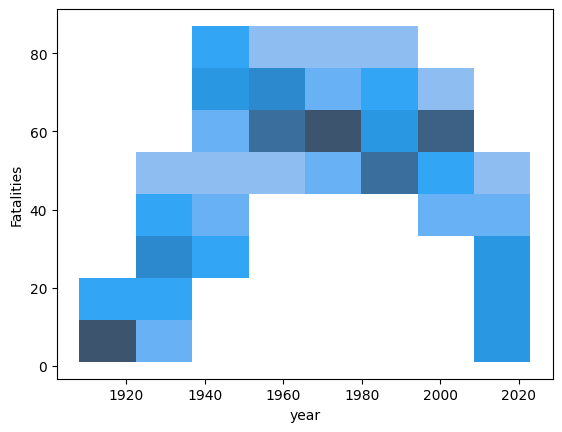

In [55]:
sns.histplot(data=crashes_by_year,x='year',y='Fatalities')

<Axes: xlabel='Date', ylabel='Fatalities'>

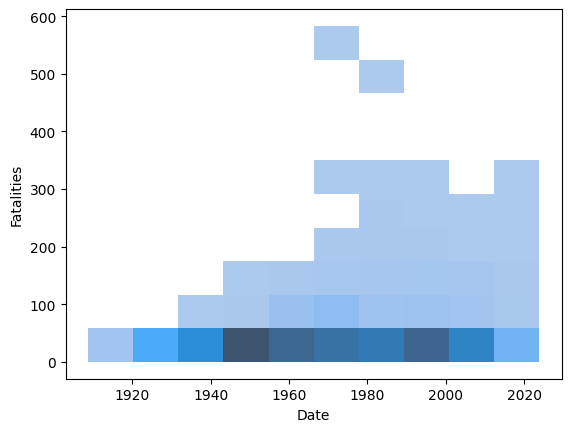

In [56]:
sns.histplot(data=airplane_crashes_cleaned,x='Date',y='Fatalities',bins=10)

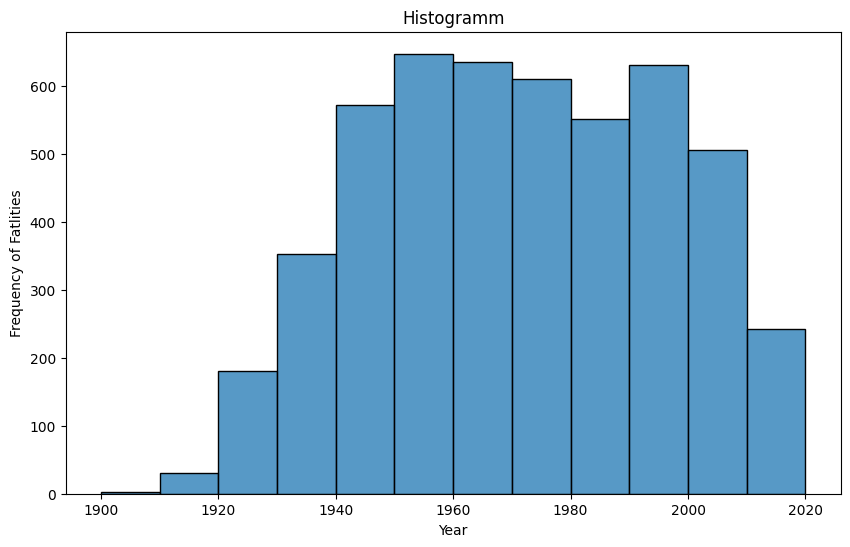

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.histplot(data=crashes_by_year, x='year',weights='Fatalities', bins=range(1900, 2023, 10), kde=False)
plt.title('Histogramm')
plt.xlabel('Year')
plt.ylabel('Frequency of Fatlities')
plt.show()

In [59]:
fatalities = airplane_crashes_cleaned['Fatalities']
aboard = airplane_crashes_cleaned['Aboard']

mean_fatalities = np.mean(fatalities)
median_fatalities = np.median(fatalities)
std_dev_fatalities = np.std(fatalities)

survival_rates = 1 - (fatalities / aboard)


mean_survival_rate = np.mean(survival_rates)
median_survival_rate = np.median(survival_rates)
std_dev_survival_rate = np.std(survival_rates)


print("Fatalities:")
print("Mean:", mean_fatalities)
print("Median:", median_fatalities)
print("Standard Deviation:", std_dev_fatalities)

print("\nSurvival Rates:")
print("Mean:", mean_survival_rate)
print("Median:", survival_rates.median())
print("Standard Deviation:", std_dev_survival_rate)

Fatalities:
Mean: 22.388086642599276
Median: 11.0
Standard Deviation: 35.068387866945876

Survival Rates:
Mean: 0.18146741869592012
Median: 0.0
Standard Deviation: 0.31175687933586915


In [60]:
from scipy.stats import ttest_ind

crashes_by_year['decade'] = pd.cut(crashes_by_year['year'], bins=range(1900, 2031, 10), right=False, labels=range(1900, 2030, 10))
fatalities_1980s = crashes_by_year[crashes_by_year['decade'] == 1990]['Fatalities']
fatalities_1990s = crashes_by_year[crashes_by_year['decade'] == 2010]['Fatalities']

t_statistic, p_value = ttest_ind(fatalities_1980s, fatalities_1990s)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the average number of fatalities between the 1980s and 1990s.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the average number of fatalities between the 1980s and 1990s.")


T-Statistic: 11.73193867272071
P-Value: 7.253810745072632e-10
Reject the null hypothesis. There is a significant difference in the average number of fatalities between the 1980s and 1990s.


In [61]:
airplane_crashes_cleaned.head()

,Date,Time,Location,Operator,Route,AC Type,Aboard,Fatalities,Ground,Summary,year
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,1.0,1.0,0.0,Eugene Lefebvre was the first pilot to ever be...,1909
2,1912-07-12,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912
3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913
4,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913


In [62]:
crashes_by_location = airplane_crashes_cleaned.groupby(['Location'])['Fatalities'].count().nlargest(20).reset_index()

In [63]:
crashes_by_location

,Location,Fatalities
0,"Moscow, Russia",17
1,"Manila, Philippines",15
2,"New York, New York",14
3,"Cairo, Egypt",13
4,"Sao Paulo, Brazil",13
5,"Bogota, Colombia",12
6,"Rio de Janeiro, Brazil",12
7,"Chicago, Illinois",11
8,"Near Moscow, Russia",11
9,"Tehran, Iran",10


In [64]:
from scipy.stats import ttest_ind


fatalities_Moscow = airplane_crashes_cleaned[airplane_crashes_cleaned['Location'] == 'Moscow, Russia']['Fatalities']
fatalities_Chicago = airplane_crashes_cleaned[airplane_crashes_cleaned['Location'] == 'Chicago, Illinois']['Fatalities']

# Conduct t-test
t_statistic, p_value = ttest_ind(fatalities_Moscow, fatalities_Chicago)

# Print results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the average number of fatalities between Moscow, Russia and Chicago, Illinois.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the average number of fatalities between Moscow, Russia and Chicago, Illinois.")


T-Statistic: 1.8024194833268639
P-Value: 0.08308476491192973
Fail to reject the null hypothesis. There is no significant difference in the average number of fatalities between Moscow, Russia and Chicago, Illinois.
